<a href="https://colab.research.google.com/github/Uncle-Solomon/NeuralLearnTutorials/blob/master/Neuralearn_Car_prediction_with_Neural_nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError


In [ ]:
dataset = pd.read_csv('train.csv')
dataset.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [ ]:
x = dataset[['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque']]
y = dataset['current price']

print(x.shape)
print(y.shape)

(1000, 8)
(1000,)


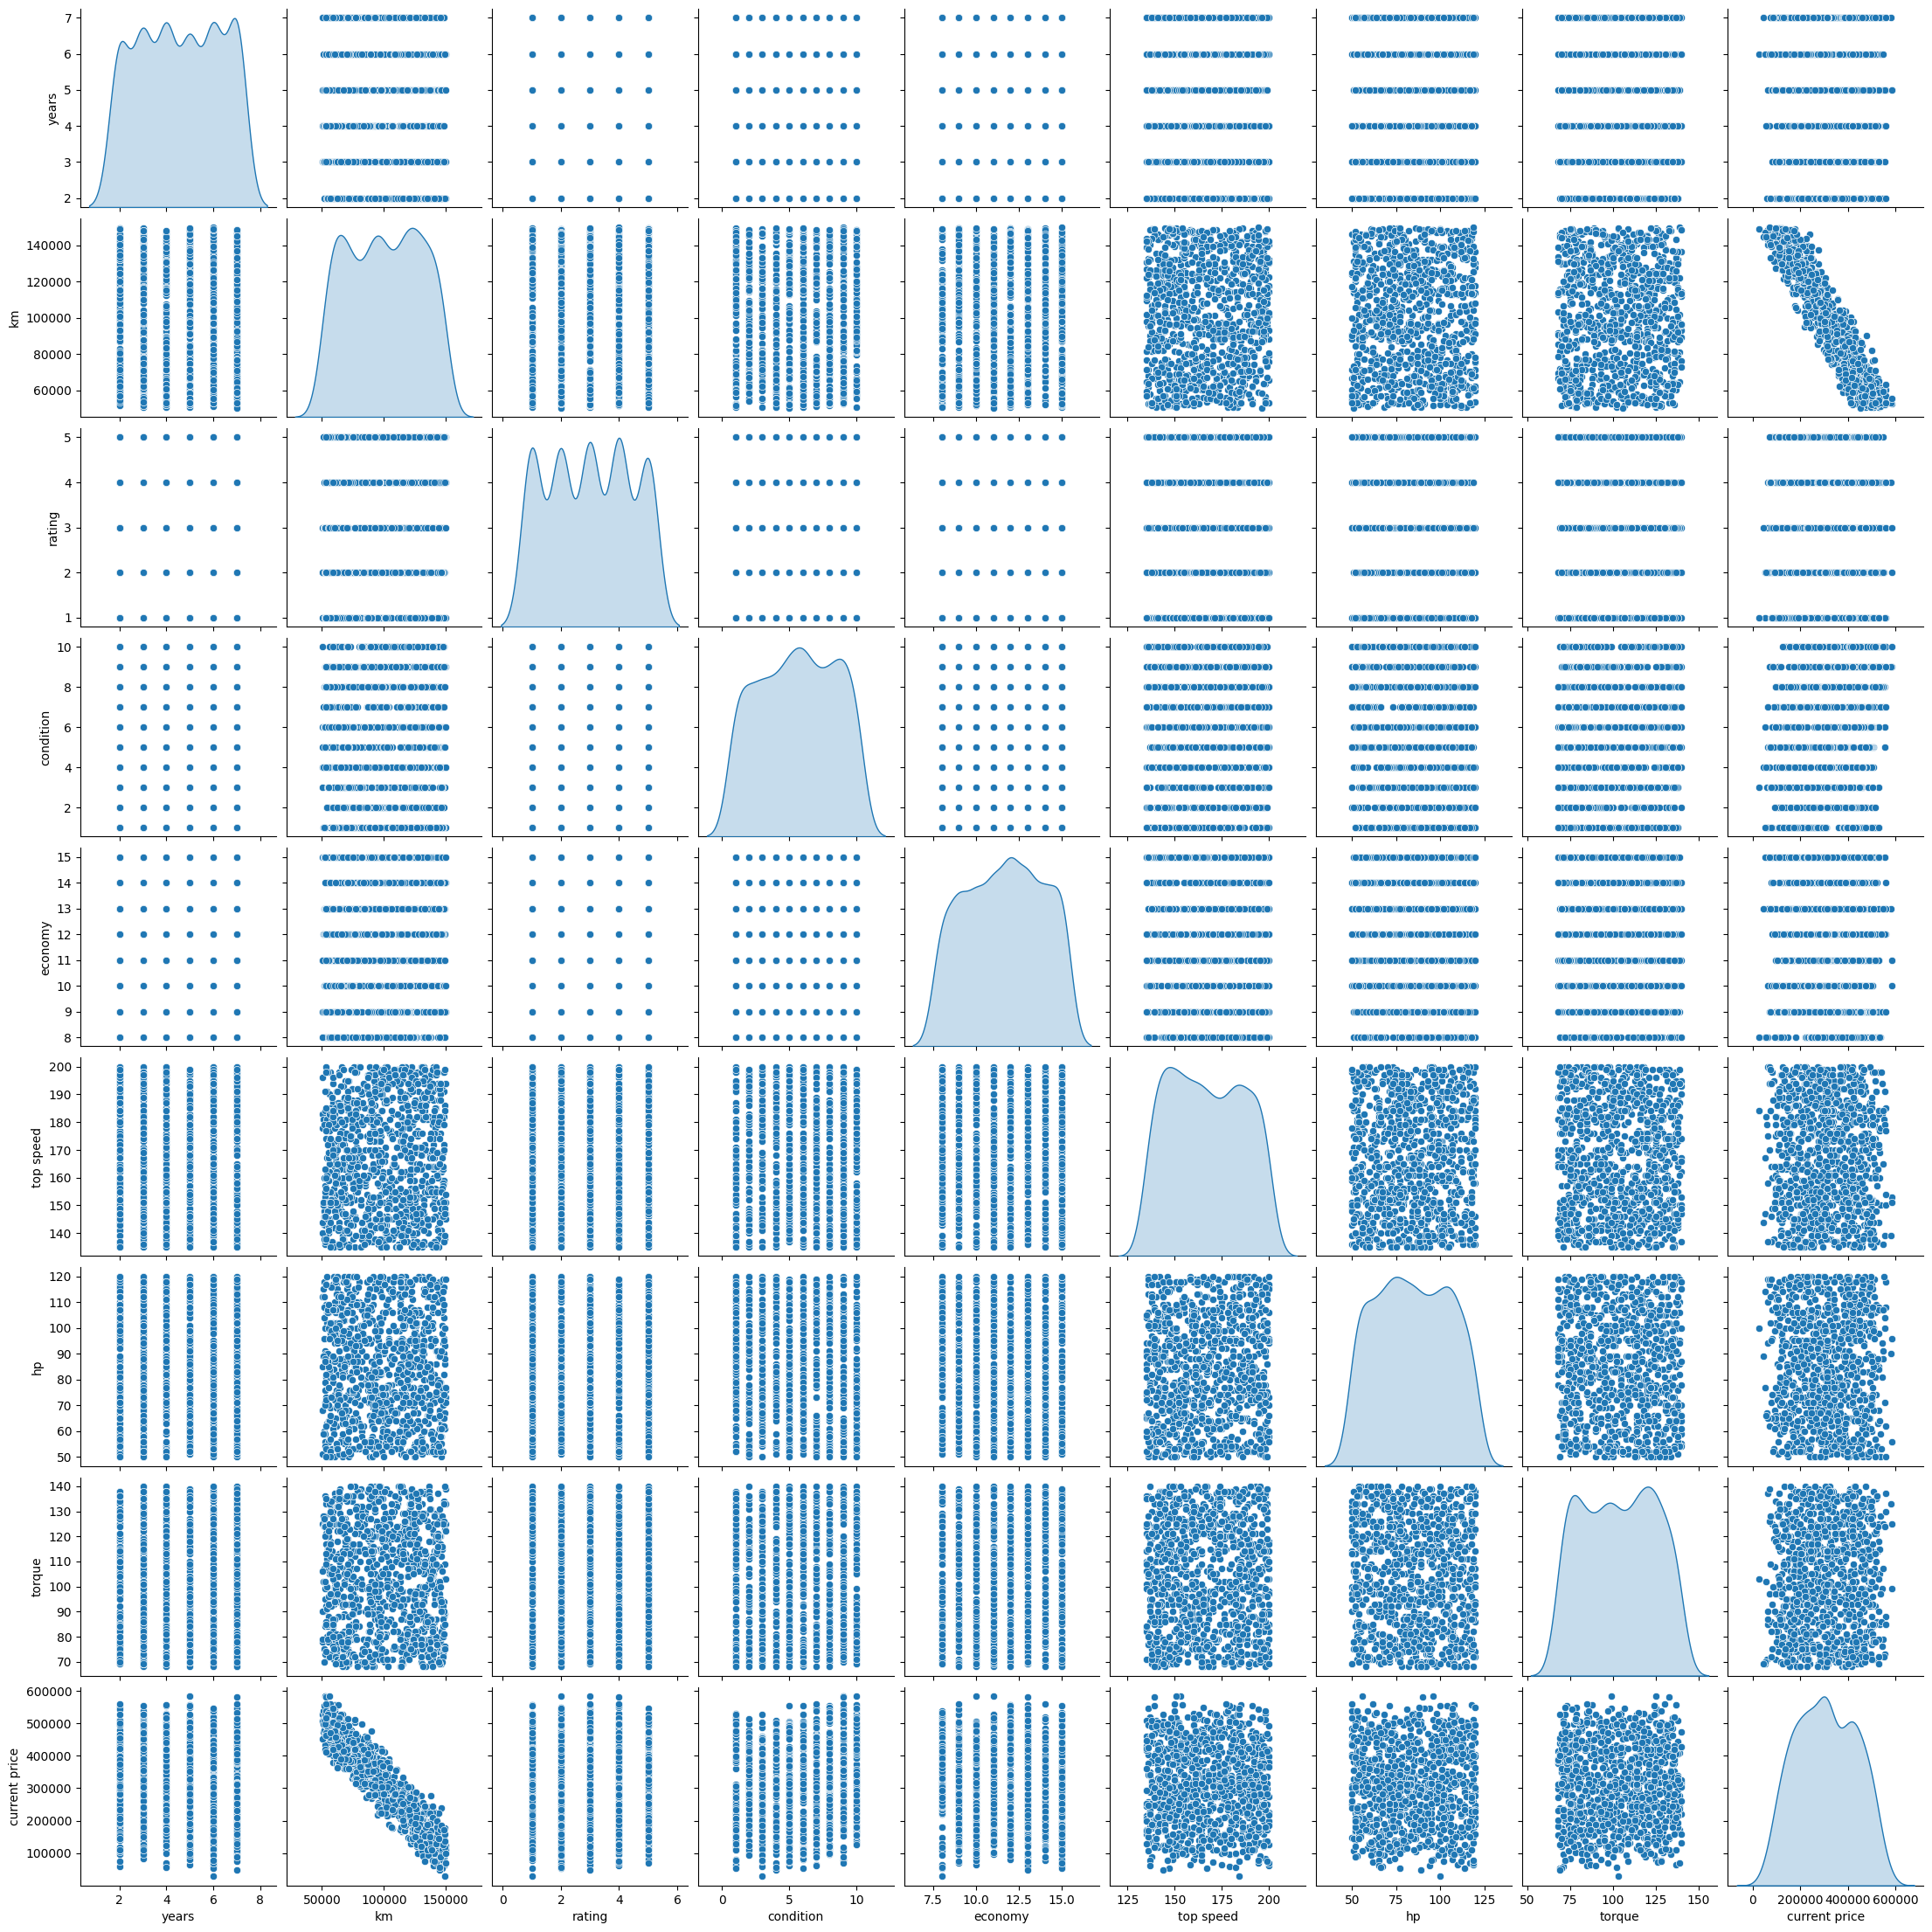

In [ ]:
sns.pairplot(dataset[['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']], diag_kind='kde')

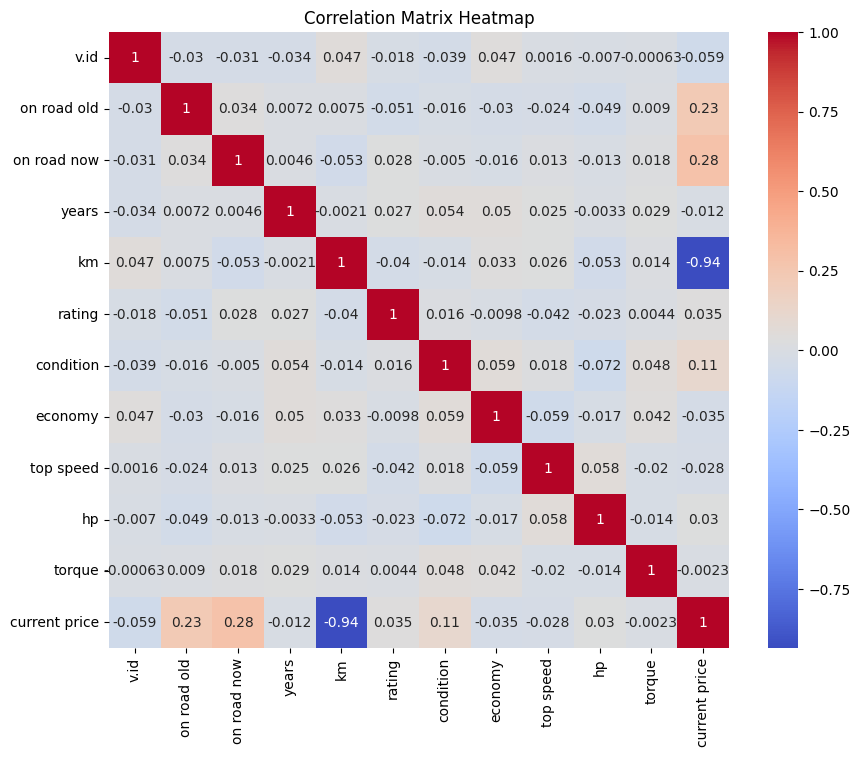

In [ ]:
correlation_matrix = dataset.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


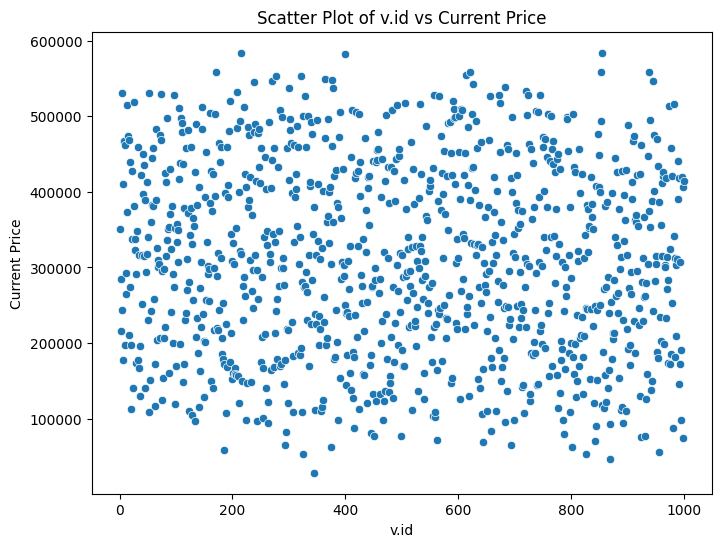

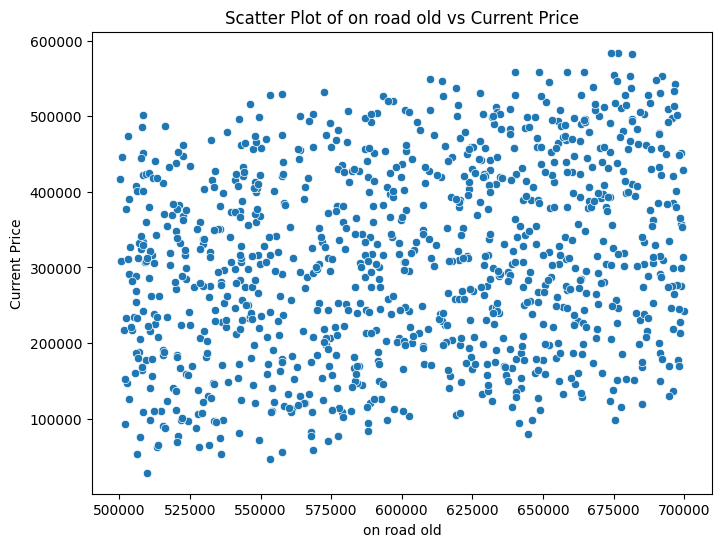

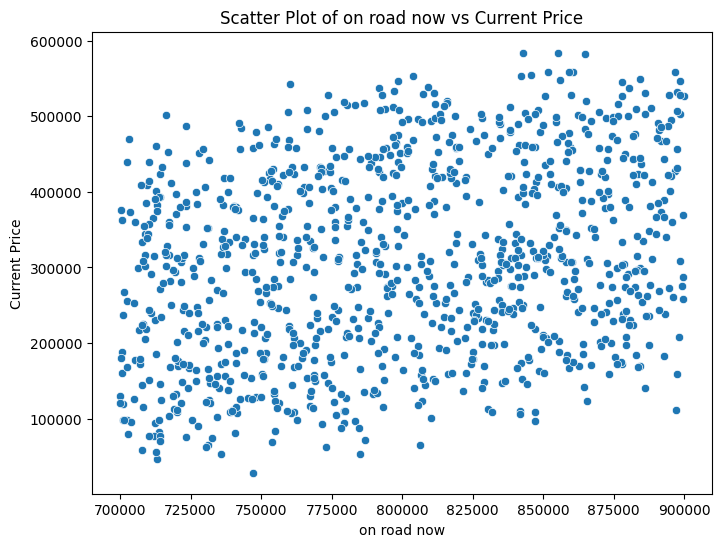

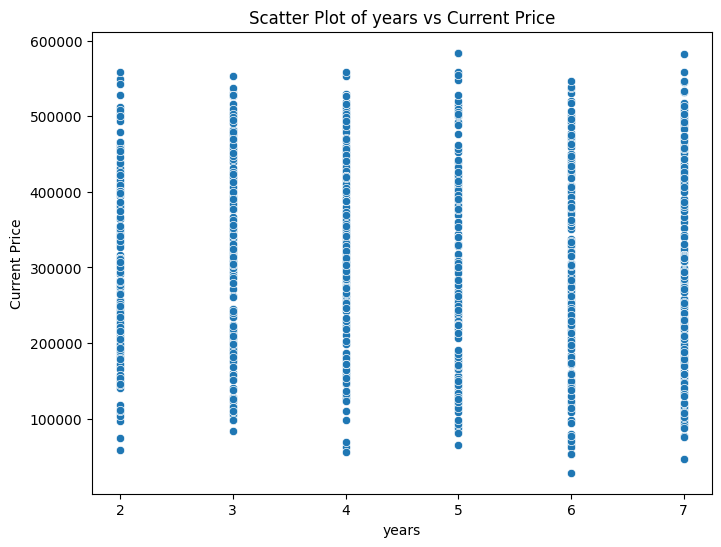

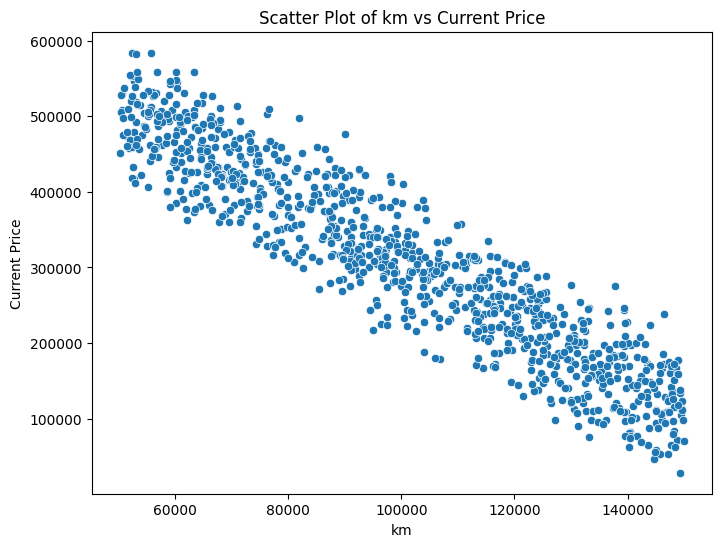

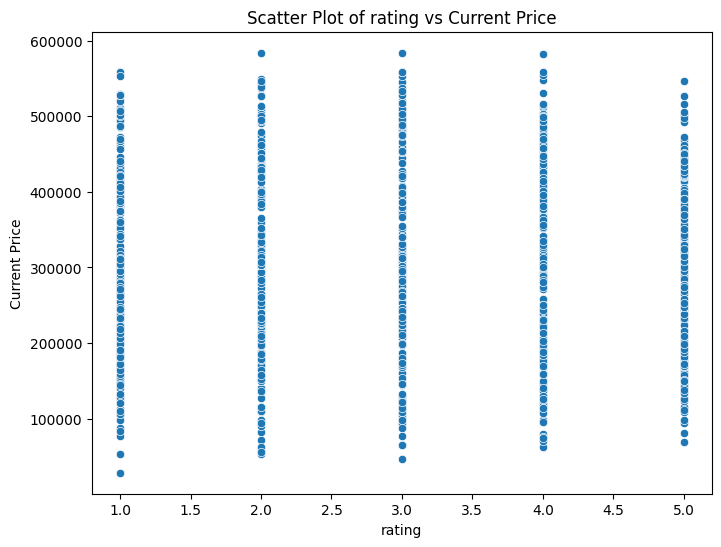

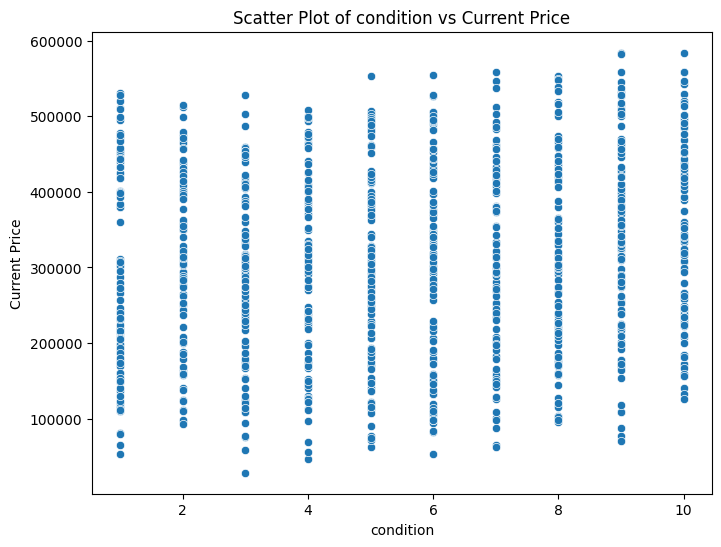

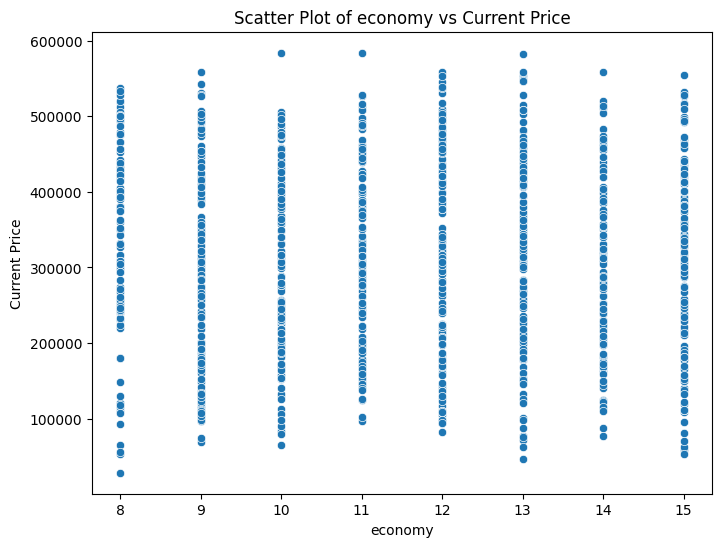

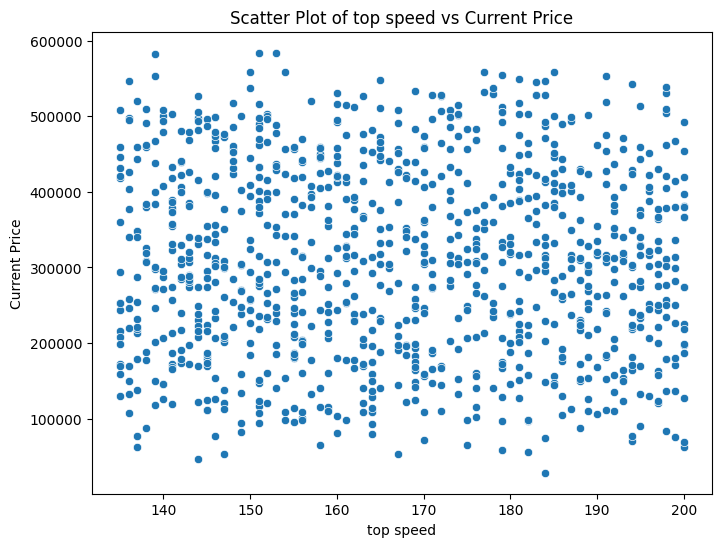

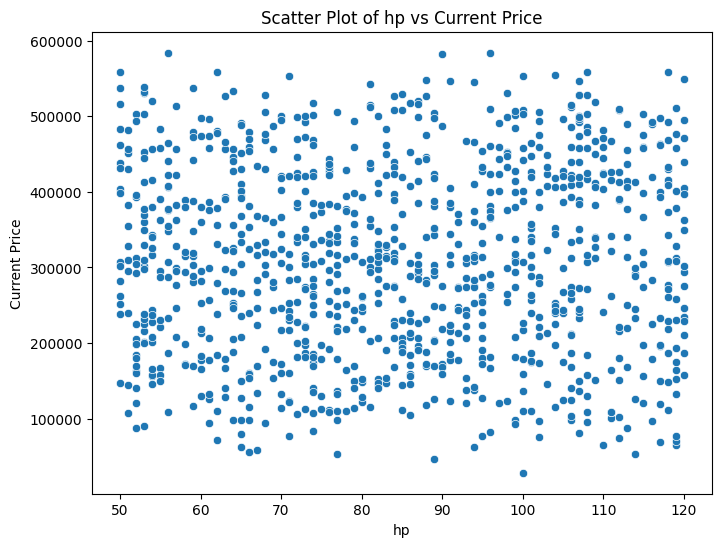

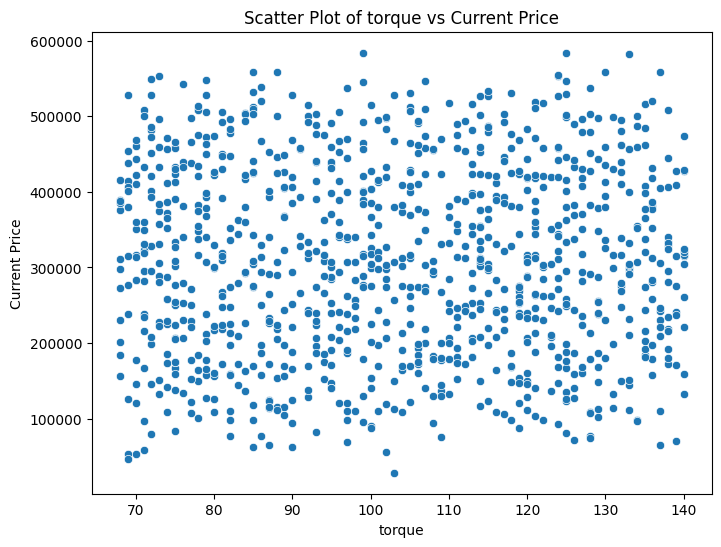

In [ ]:
# Get the list of columns excluding the target column
features = [col for col in dataset.columns if col != 'current price']

# Plot each feature against the target column
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=dataset, x=feature, y='current price')
    plt.title(f'Scatter Plot of {feature} vs Current Price')
    plt.xlabel(feature)
    plt.ylabel('Current Price')
    plt.show()

In [ ]:
tensor_data = tf.constant(dataset)
tensor_data = tf.cast(tensor_data, tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [ ]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[7.450000e+02 6.402490e+05 7.929940e+05 2.000000e+00 5.443400e+04
  1.000000e+00 9.000000e+00 1.100000e+01 1.720000e+02 1.070000e+02
  7.900000e+01 5.286340e+05]
 [5.560000e+02 6.425690e+05 7.712340e+05 2.000000e+00 8.152500e+04
  1.000000e+00 1.000000e+01 1.400000e+01 1.350000e+02 8.100000e+01
  1.360000e+02 4.310600e+05]
 [9.460000e+02 5.084830e+05 7.886510e+05 3.000000e+00 1.016570e+05
  3.000000e+00 4.000000e+00 1.200000e+01 1.780000e+02 7.100000e+01
  1.240000e+02 2.427095e+05]
 [3.320000e+02 6.481980e+05 8.584190e+05 2.000000e+00 1.255190e+05
  3.000000e+00 8.000000e+00 8.000000e+00 1.850000e+02 1.050000e+02
  1.090000e+02 2.679535e+05]
 [9.900000e+02 5.878120e+05 8.581100e+05 4.000000e+00 7.489500e+04
  5.000000e+00 8.000000e+00 1.500000e+01 1.480000e+02 8.700000e+01
  1.170000e+02 4.411040e+05]], shape=(5, 12), dtype=float32)


In [ ]:
x  = tensor_data[:,3:-1]
print(x.shape)
y = tensor_data[:, -1]
y = tf.expand_dims(y, axis=-1)
print(y.shape)

(1000, 8)
(1000, 1)


In [ ]:
normalizer = Normalization()
x_normalized = tf.constant([[3,4,5,6,7],[4,5,6,7,9], [13,15,61,71,94]], dtype=tf.float32)
normalizer.adapt(x_normalized)
normalizer(x_normalized)

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[-0.8153742 , -0.8053873 , -0.72612935, -0.7234859 , -0.73162496],
       [-0.5929994 , -0.60404044, -0.68791205, -0.69060016, -0.68230194],
       [ 1.4083737 ,  1.4094278 ,  1.4140414 ,  1.4140861 ,  1.4139267 ]],
      dtype=float32)>

In [ ]:
print(x.shape)

(1000, 8)


In [ ]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(x)

In [ ]:
x_train = x[:int(TRAIN_RATIO*DATASET_SIZE)]
y_train = y[:int(TRAIN_RATIO*DATASET_SIZE)]
print(x_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
for x,y in train_dataset:
  print(x,y)
  break

tf.Tensor(
[[7.00000e+00 7.68600e+04 2.00000e+00 9.00000e+00 1.30000e+01 1.39000e+02
  9.30000e+01 8.60000e+01]
 [2.00000e+00 1.25519e+05 3.00000e+00 8.00000e+00 8.00000e+00 1.85000e+02
  1.05000e+02 1.09000e+02]
 [3.00000e+00 1.01657e+05 3.00000e+00 4.00000e+00 1.20000e+01 1.78000e+02
  7.10000e+01 1.24000e+02]
 [2.00000e+00 1.14702e+05 4.00000e+00 5.00000e+00 1.10000e+01 1.75000e+02
  6.10000e+01 1.20000e+02]
 [4.00000e+00 7.48950e+04 5.00000e+00 8.00000e+00 1.50000e+01 1.48000e+02
  8.70000e+01 1.17000e+02]
 [7.00000e+00 1.17240e+05 4.00000e+00 9.00000e+00 1.50000e+01 1.48000e+02
  7.30000e+01 7.70000e+01]
 [2.00000e+00 1.20128e+05 3.00000e+00 1.00000e+01 1.50000e+01 1.52000e+02
  7.10000e+01 7.10000e+01]
 [7.00000e+00 6.30980e+04 3.00000e+00 2.00000e+00 1.50000e+01 1.87000e+02
  9.80000e+01 1.31000e+02]
 [4.00000e+00 9.55560e+04 5.00000e+00 1.00000e+00 8.00000e+00 1.50000e+02
  9.50000e+01 1.03000e+02]
 [7.00000e+00 1.13074e+05 4.00000e+00 7.00000e+00 1.00000e+01 1.68000e+02
  1.19

In [ ]:
x_val = x[int(TRAIN_RATIO*DATASET_SIZE):int((VAL_RATIO + TRAIN_RATIO)*DATASET_SIZE)]
y_val = y[int(TRAIN_RATIO*DATASET_SIZE):int((VAL_RATIO + TRAIN_RATIO)*DATASET_SIZE)]
print(x_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [ ]:
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
for x,y in val_dataset:
  print(x,y)
  break

In [ ]:
x_test = x[int((VAL_RATIO + TRAIN_RATIO)*DATASET_SIZE):]
y_test = y[int((VAL_RATIO + TRAIN_RATIO)*DATASET_SIZE):]
print(x_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
normalizer = Normalization()
normalizer.adapt(x_train)
print(normalizer(x_train)[:5])

tf.Tensor(
[[-1.4828277  -1.5624225  -1.4338868   1.200678   -0.28071508  0.28978655
   1.1058182  -1.1832622 ]
 [-1.4828277  -0.6301926  -1.4338868   1.5597593   1.0721339  -1.6442922
  -0.1600597   1.5151159 ]
 [-0.90274805  0.06257086 -0.01419688 -0.5947281   0.1702346   0.603421
  -0.6469358   0.94703627]
 [-1.4828277   0.88368756 -0.01419688  0.8415968  -1.633564    0.96932775
   1.008443    0.23693676]
 [-0.3226685  -0.8583379   1.405493    0.8415968   1.5230836  -0.96475106
   0.13206595  0.6156565 ]], shape=(5, 8), dtype=float32)


In [ ]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(8,)),
    normalizer,
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
    ])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_8 (Dense)             (None, 128)               1152      
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 34322 (134.07 KB)
Trainable params: 34305 (134.00 KB)
Non-trainable params: 17 (72.00 Byte)
______________

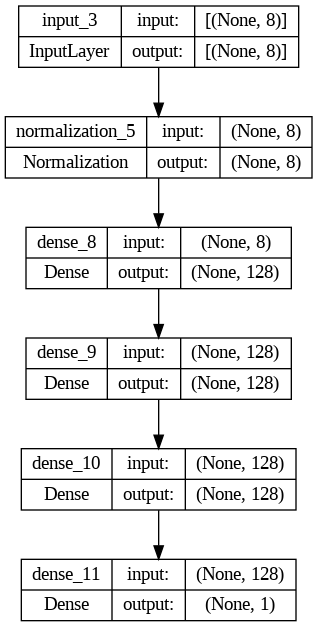

In [ ]:
tf.keras.utils.plot_model(model, to_file= 'model.png', show_shapes=True)

In [ ]:
model.compile(loss = MeanAbsoluteError(), optimizer=Adam(learning_rate=0.001), metrics=RootMeanSquaredError())

In [ ]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=100, verbose=1)

Epoch 1/100
25/25 [==============================] - 0s 9ms/step - loss: 309904.8125 - root_mean_squared_error: 334464.5625 - val_loss: 301087.9688 - val_root_mean_squared_error: 324699.2188
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 309102.4688 - root_mean_squared_error: 333732.1562 - val_loss: 299791.0000 - val_root_mean_squared_error: 323522.8438
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 307024.1250 - root_mean_squared_error: 331834.4688 - val_loss: 296732.0312 - val_root_mean_squared_error: 320752.2812
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 302542.6875 - root_mean_squared_error: 327750.0938 - val_loss: 290574.7500 - val_root_mean_squared_error: 315188.7812
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 294058.0625 - root_mean_squared_error: 320053.6875 - val_loss: 279505.9062 - val_root_mean_squared_error: 305245.6250
Epoch 6/100
25/25 [==========================

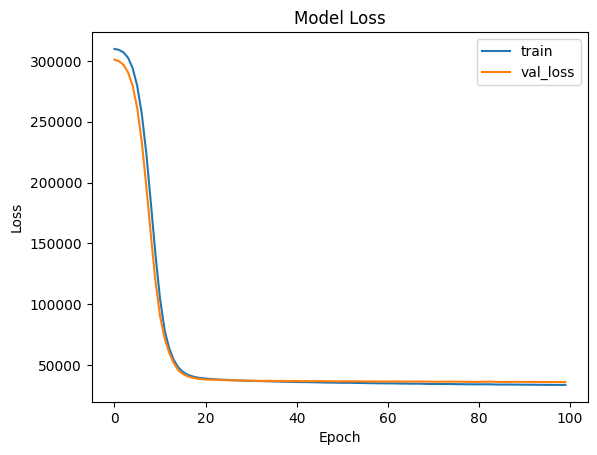

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val_loss'])
plt.show()

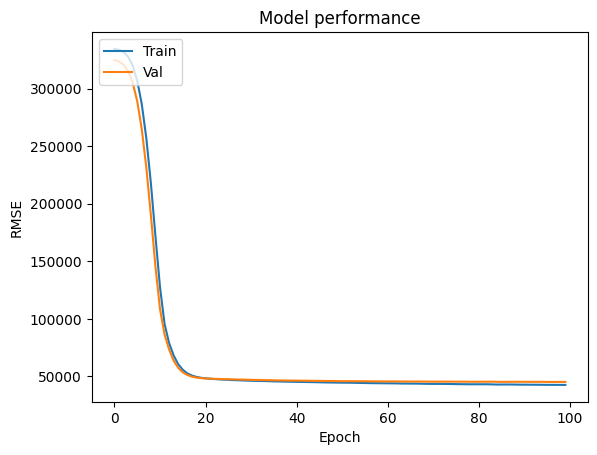

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model performance')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 6ms/step - loss: 44695.7656 - root_mean_squared_error: 53130.3125


[44695.765625, 53130.3125]

In [ ]:
model.predict(x_test[0]).shape

1/1 [==============================] - 0s 150ms/step


(1, 1)

In [ ]:
model.predict(tf.expand_dims(x_test[0], axis=0))

1/1 [==============================] - 0s 137ms/step


array([[447476.94]], dtype=float32)

In [ ]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([472972.5], dtype=float32)>

In [ ]:
y_true = list(y_test[:,0].numpy())
y_pred = list(model.predict(x_test)[:,0])

4/4 [==============================] - 0s 4ms/step


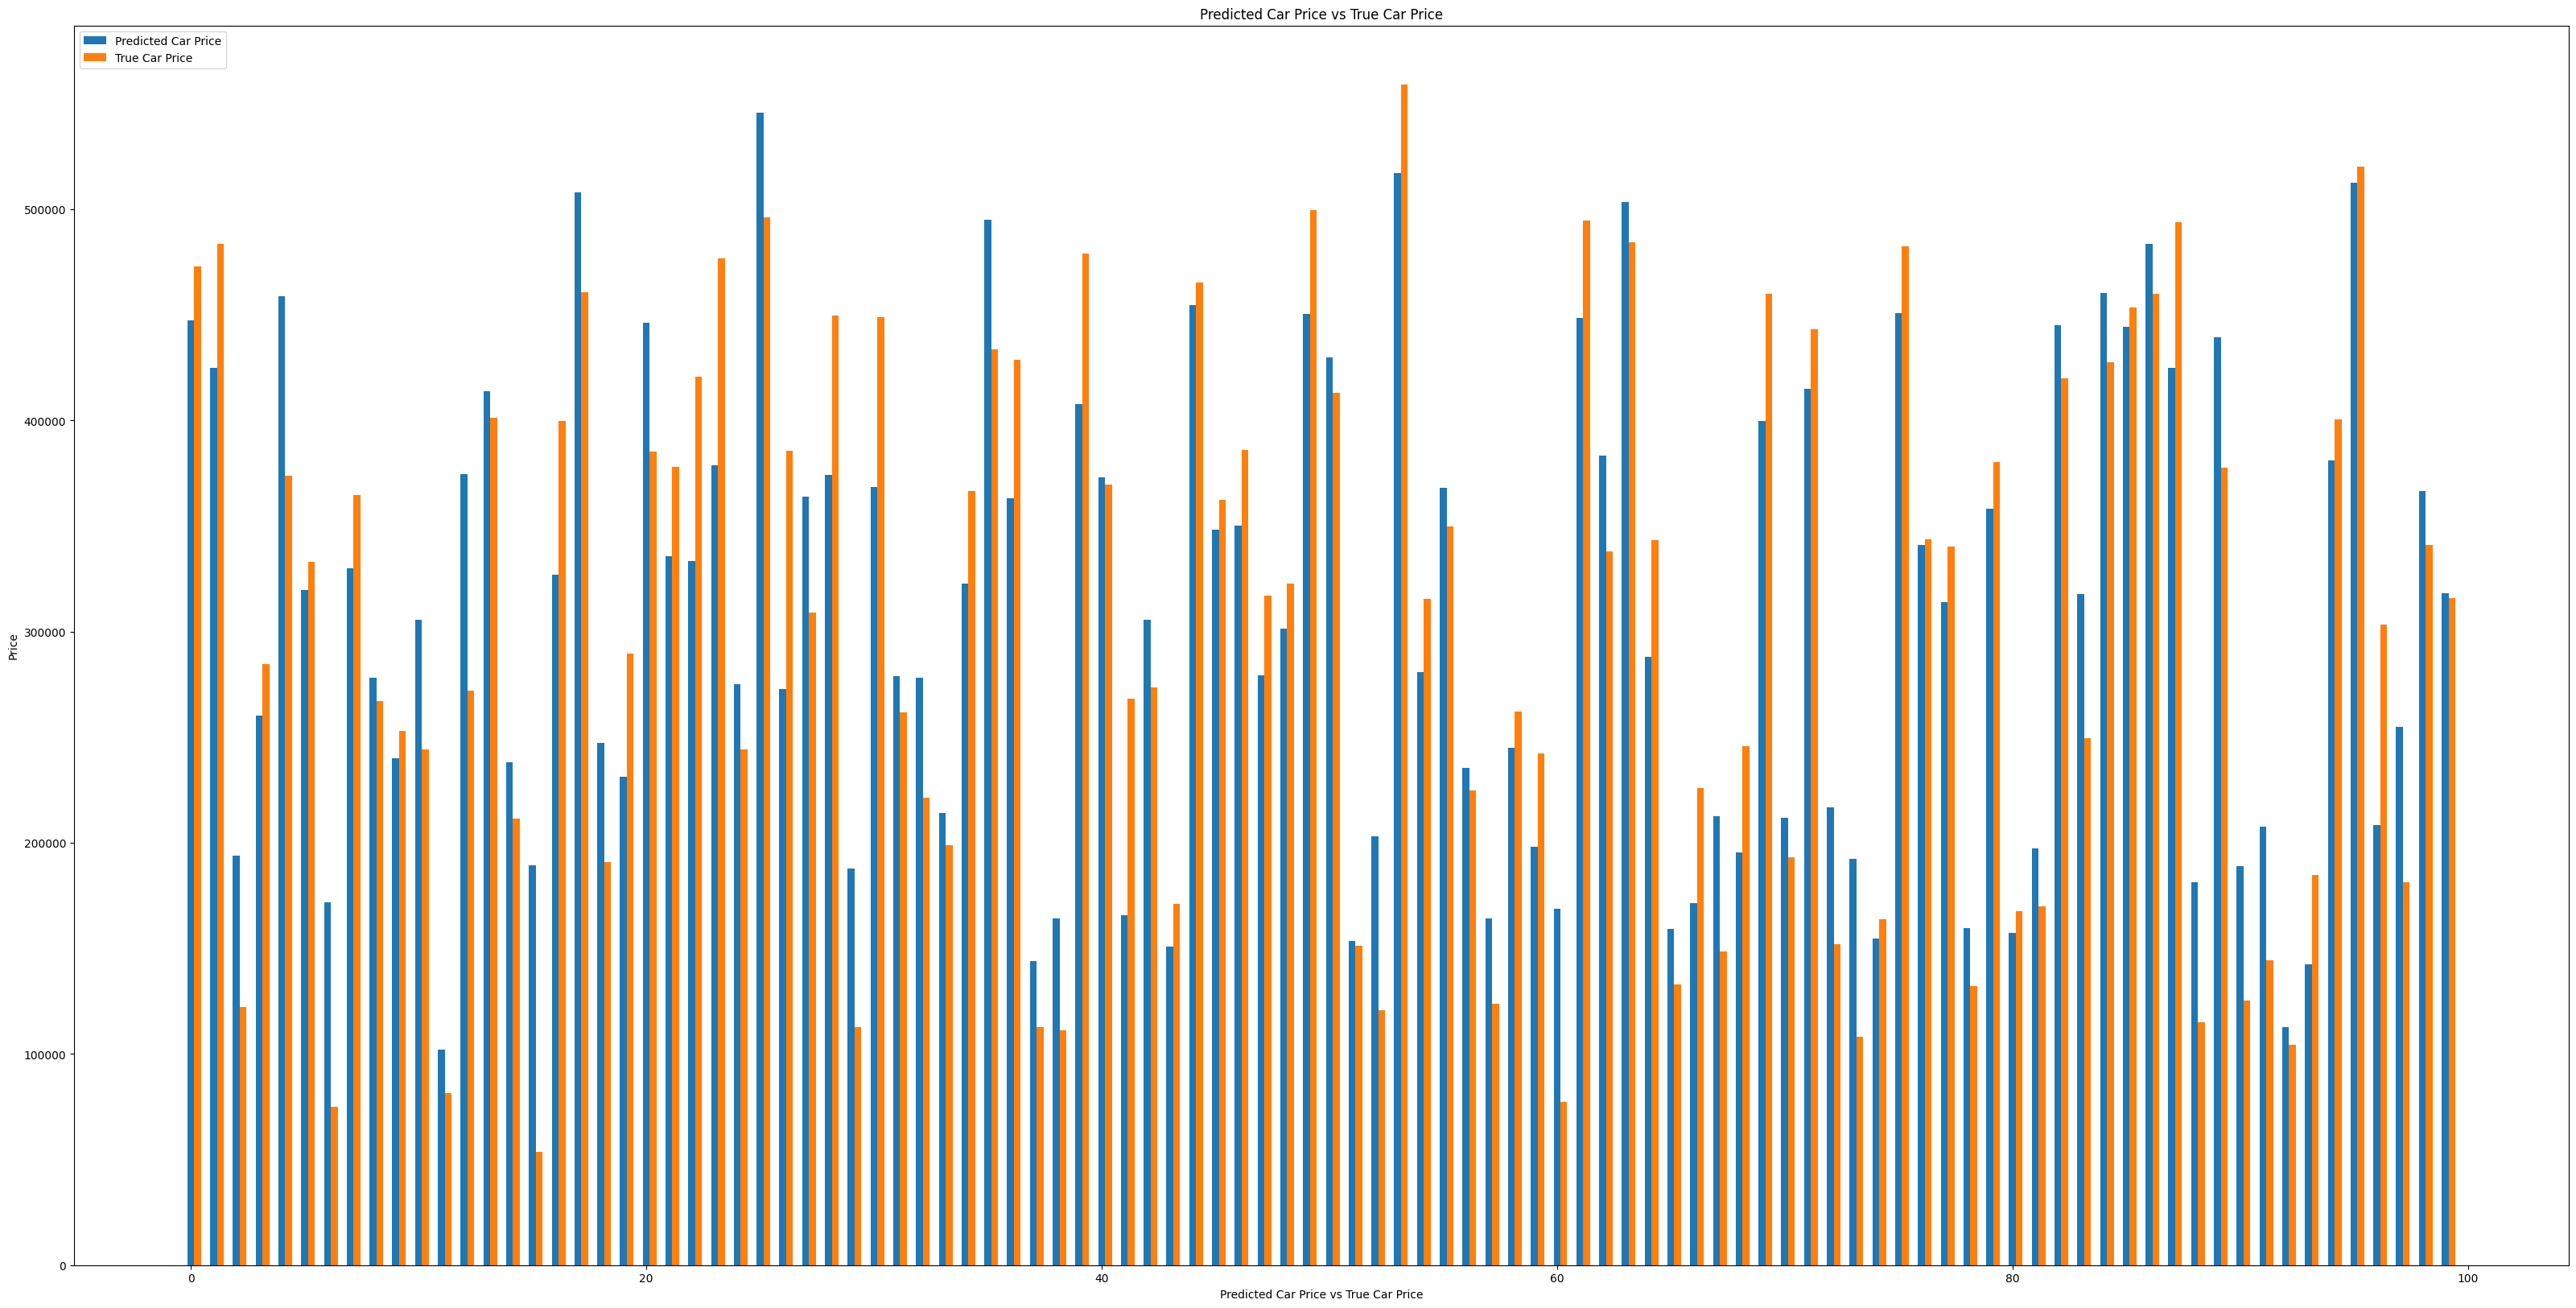

In [ ]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.3

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='True Car Price')

plt.title('Predicted Car Price vs True Car Price')
plt.xlabel('Predicted Car Price vs True Car Price')
plt.ylabel('Price')

plt.legend(loc='upper left')
plt.show()